Goal is to create an algorithm that takes a D8 grid and a number of samples and returns the localities of the sample sites that best subdivide the area.

## Generate example landscape

/home/alex/anaconda3/envs/working/bin/python


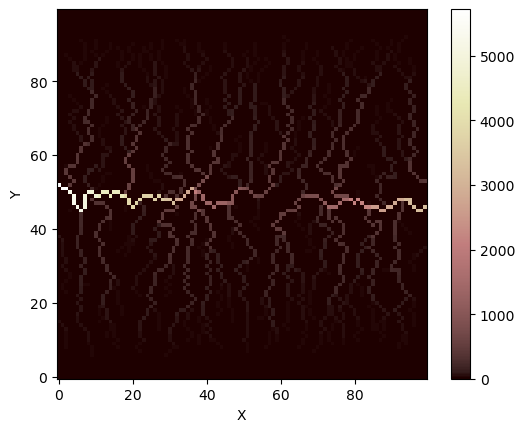

<Figure size 640x480 with 0 Axes>

In [2]:
import sys
import os

print(sys.executable)

import landlab
import matplotlib.pyplot as plt
import numpy as np
from landlab import RasterModelGrid
from landlab.components import FlowAccumulator, SinkFillerBarnes

# nx = 100
# ny = 100
# mg = RasterModelGrid(shape=(nx, ny))
# z = np.zeros(mg.shape)
# for i in range(nx):
#     for j in range(ny):
#         z[i, j] = (i - (nx / 2)) ** 2 + (100 * np.random.rand())
# mg.add_field("topographic__elevation", z)
# mg.set_closed_boundaries_at_grid_edges(False, True, False, True)

# sb = SinkFillerBarnes(mg)
# sb.run_one_step()

# mg.save("topo.asc",names='topographic__elevation')


ascii_data = landlab.io.esri_ascii.read_esri_ascii("topo.asc")
mg = ascii_data[0]
mg.add_field("topographic__elevation", ascii_data[1])
frr = FlowAccumulator(mg, flow_director="FlowDirectorD8")
frr.run_one_step()
landlab.plot.imshow_grid(mg, "drainage_area", output=True)

In [22]:
def fast_delete(x,elements):
    indices = np.ravel([np.where(x==e) for e in elements])
    return(np.delete(x,indices))

fast_delete(np.array([1,2,3,4,5,6,7,8]),[2,5,6])

NameError: name 'array' is not defined

In [31]:
def get_sample_nodes_by_area(model_grid, target_area):

    print("~~~~~~~ Beginning Calculation ~~~~~~~")
    # Node array contining downstream-to-upstream ordered list of node
    ordered_nodes = model_grid.at_node["flow__upstream_node_order"]
    receiver_at_node = model_grid.at_node["flow__receiver_node"]
    A_per_samp = target_area

    samps_allocated = 0

    V = []  # visited nodes
    uV = ordered_nodes.tolist()  # unvisited otes
    sample_nodes = {}
    samps_allocated = 0
    counter = 0
    print("Target area = ", A_per_samp)
    print("Looping through all nodes")
    for i in np.arange(len(ordered_nodes) - 1, -1, -1):
        if counter % 2000 == 0:
            print("\t Processing node", counter, "of", len(ordered_nodes))
        # Iterate from upstream to downstream
        node = ordered_nodes[i]  # Node in network

        unvis_up_nodes = [node]
        for new_up_node in uV[np.where(uV==node)[0][0]:]:
            if receiver_at_node[new_up_node] in unvis_up_nodes:
                unvis_up_nodes.append(new_up_node)

        if len(unvis_up_nodes) > A_per_samp:
            print("\t Found a sample locality:", node)
            sample_nodes[node] = unvis_up_nodes  # Add node to list
            for x in unvis_up_nodes:  # Remove added nodes to unvisited list
                uV.remove(x)
            samps_allocated += 1
        counter += 1
    print("Found", samps_allocated, "sample localities")
    area_sizes = [len(areas) for _, areas in sample_nodes.items()]
    mean, std = np.mean(area_sizes), np.std(area_sizes)
    print("Average area per basin = ", mean, "+/-", std)
    print("~~~~~~~ Finished Calculation ~~~~~~~")
    return sample_nodes

out = get_sample_nodes_by_area(mg,100)



~~~~~~~ Beginning Calculation ~~~~~~~
Target area =  100
Looping through all nodes
	 Processing node 0 of 10000
	 Found a sample locality: 8095
	 Found a sample locality: 6197
	 Found a sample locality: 5895
	 Found a sample locality: 7909
	 Found a sample locality: 8106
	 Found a sample locality: 6307
	 Found a sample locality: 5710
	 Found a sample locality: 7826
	 Found a sample locality: 7918
	 Found a sample locality: 6622
	 Found a sample locality: 6517
	 Processing node 2000 of 10000
	 Found a sample locality: 6429
	 Found a sample locality: 6028
	 Found a sample locality: 7549
	 Found a sample locality: 7345
	 Found a sample locality: 6343
	 Found a sample locality: 8237
	 Found a sample locality: 7038
	 Found a sample locality: 5440
	 Found a sample locality: 5447
	 Found a sample locality: 7452
	 Found a sample locality: 8161
	 Found a sample locality: 7561
	 Found a sample locality: 6561
	 Found a sample locality: 5357
	 Found a sample locality: 5157
	 Found a sample localit